In [1]:
import numpy as np
import pandas as pd
from scipy import log,exp,sqrt,stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy.random as npr

In [4]:
#Exact Solution
def BS_Call_Exact(S,X,r,sigma,T,t):

    d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
    d2 = d1-sigma*sqrt((T-t))

    ST = S*stats.norm.cdf(d1) - X*exp(-r*(T-t))*stats.norm.cdf(d2)

    return ST

<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt((T-t))
<ipython-input-4-c01ef2ffe8de>:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  ST = S*stats.norm.cdf(d1) - X*exp(-r*(T-t))*stats.norm.cdf(d2)


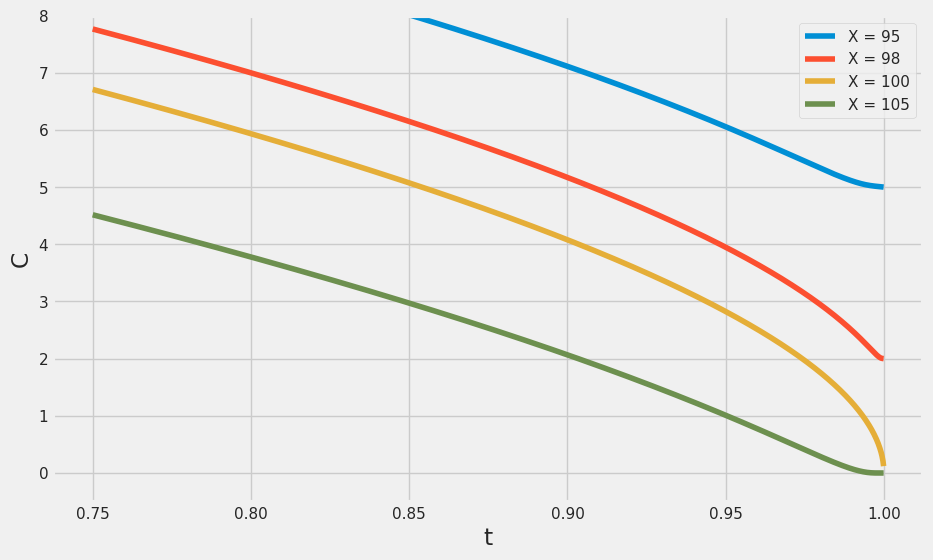

In [9]:
t = np.arange(0.75, 1.0, 0.0001)

plt.figure(figsize = (10,6))
plt.plot(t, BS_Call_Exact(100, 95, 0.06, 0.3, 1, t), label='X = 95')
plt.plot(t, BS_Call_Exact(100, 98, 0.06, 0.3, 1, t), label='X = 98')
plt.plot(t, BS_Call_Exact(100, 100, 0.06, 0.3, 1, t), label='X = 100')
plt.plot(t, BS_Call_Exact(100, 105, 0.06, 0.3, 1, t), label='X = 105')

plt.xlabel('t')
plt.ylabel('C')
plt.ylim(-0.5, 8)

plt.legend()
plt.show()

<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt((T-t))
<ipython-input-4-c01ef2ffe8de>:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  ST = S*stats.norm.cdf(d1) - X*exp(-r*(T-t))*stats.norm.cdf(d2)


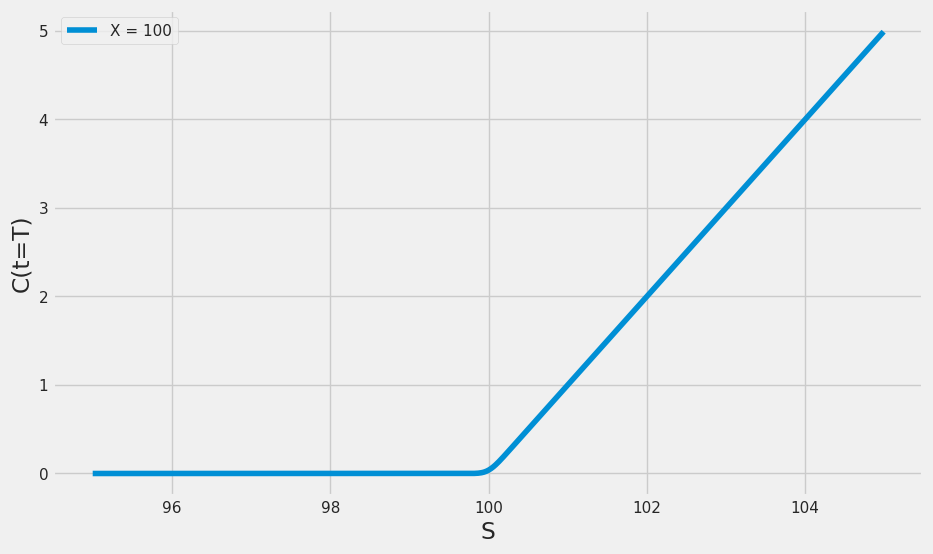

In [11]:
s = np.arange(95, 105, 0.01)

plt.figure(figsize = (10,6))
plt.plot(s,BS_Call_Exact(s,100,0.06,0.3,1,0.99999), label = 'X = 100')

plt.xlabel('S')
plt.ylabel('C(t=T)')

plt.legend()
plt.show()

In [12]:
r = 0.06      # Risk free rate
sigma = 0.3   # Standard dev
T = 1.0       # Duration of option
S0 = 100      # Asset price

I = 100000
M = 100

dt = T/M

S = np.zeros((M+1, I))
S[0] = S0
for t in range(1,M+1):
    S[t] = S[t-1]*exp((r -0.5*sigma**2)*dt +sigma*sqrt(dt)*npr.standard_normal(I))

<ipython-input-12-306fb05b4d4f>:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  S[t] = S[t-1]*exp((r -0.5*sigma**2)*dt +sigma*sqrt(dt)*npr.standard_normal(I))
<ipython-input-12-306fb05b4d4f>:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  S[t] = S[t-1]*exp((r -0.5*sigma**2)*dt +sigma*sqrt(dt)*npr.standard_normal(I))


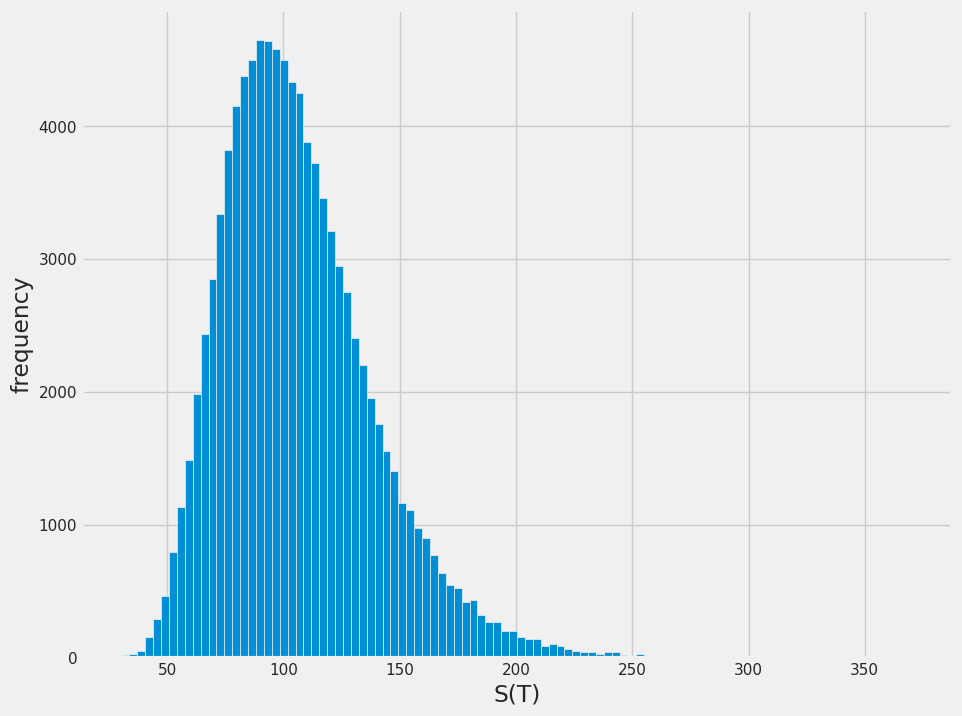

In [13]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel('S(T)')
plt.ylabel('frequency')
plt.show()

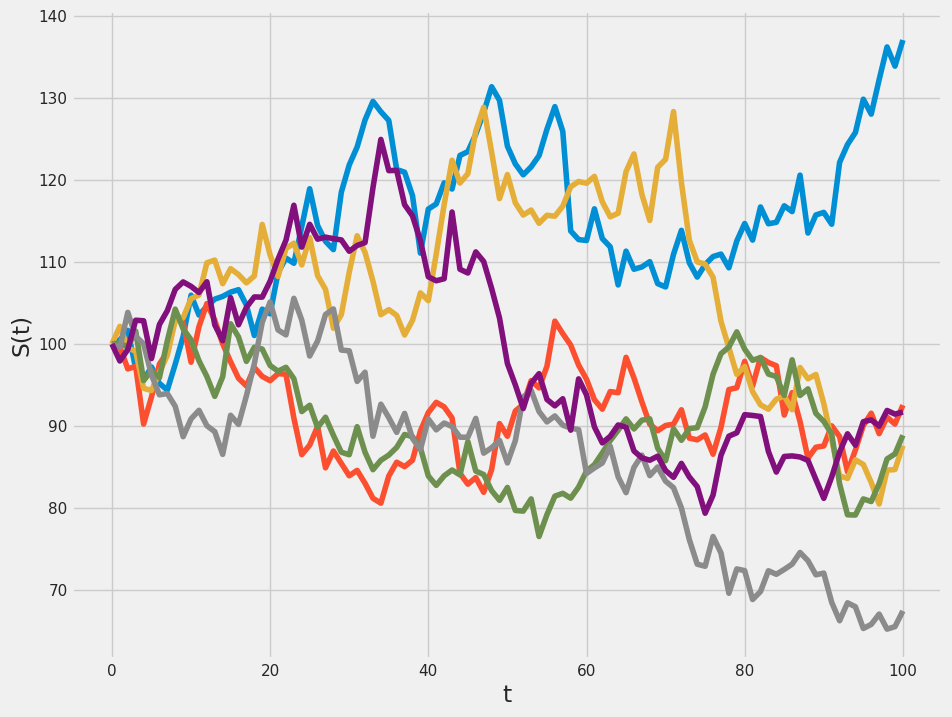

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :6])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()
# This follows a geometric brownian motion

In [15]:
def BS_Call_MC(S,X,r,sigma,T,t,I):

    data = np.zeros((I, 2))

    z = np.random.normal(0, 1, [1, I])
    ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
    data[:,1] = ST - X

    average = np.sum(np.amax(data, axis=1))/float(I)

    return np.exp(-r*(T-t))*average

In [16]:
# Monte carlo vs exact solution
print('Monte Carlo:',BS_Call_MC(100,95,0.06,0.3,1,.999,100000))
print('Exact: ',BS_Call_Exact(100,95,0.06,0.3,1,.999))

Monte Carlo: 5.005369204037867
Exact:  5.005699833982007


<ipython-input-15-8fc6333e3ea7>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
<ipython-input-15-8fc6333e3ea7>:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt((T-

<ipython-input-15-8fc6333e3ea7>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
<ipython-input-15-8fc6333e3ea7>:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt((T-

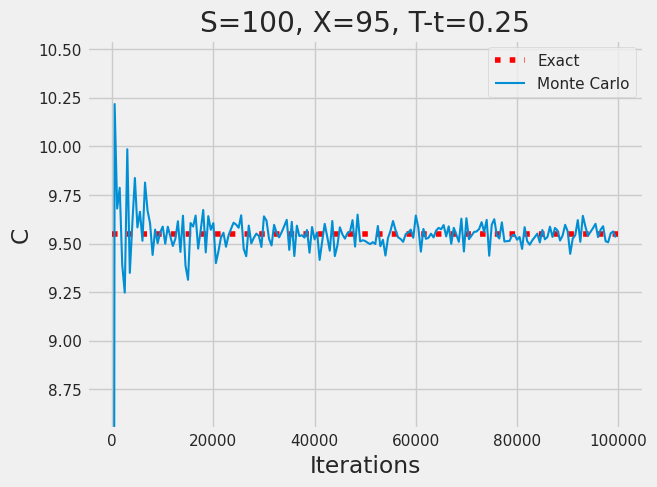

In [18]:
df = pd.DataFrame(columns=['Iter','BSc'])

data = []
for i in range(1, 100000, 500):
    data.append({'Iter': i, 'BSc': BS_Call_MC(100, 95, 0.06, 0.3, 1, 0.75, i)})

df = pd.DataFrame(data)

plt.hlines(BS_Call_Exact(100,95,0.06,0.3,1,0.75),xmin=0,xmax= 100000,linestyle='dotted',colors='red',label = 'Exact')
plt.plot(df.set_index('Iter'),lw = 1.5, label = 'Monte Carlo')

plt.title('S=100, X=95, T-t=0.25')
plt.xlabel('Iterations')
plt.ylabel('C')
plt.ylim(BS_Call_Exact(100,95,0.06,0.3,1,0.75)-1,BS_Call_Exact(100,95,0.06,0.3,1,0.75)+1)
plt.legend()
plt.show()

<ipython-input-15-8fc6333e3ea7>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
<ipython-input-15-8fc6333e3ea7>:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  ST = S*exp((T-t)*(r - 0.5*sigma**2)+sigma*sqrt(T-t)*z)
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1 = (log(S/X)+(r+((sigma**2)/2))*(T-t))/(sigma*sqrt((T-t)))
<ipython-input-4-c01ef2ffe8de>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt((T-

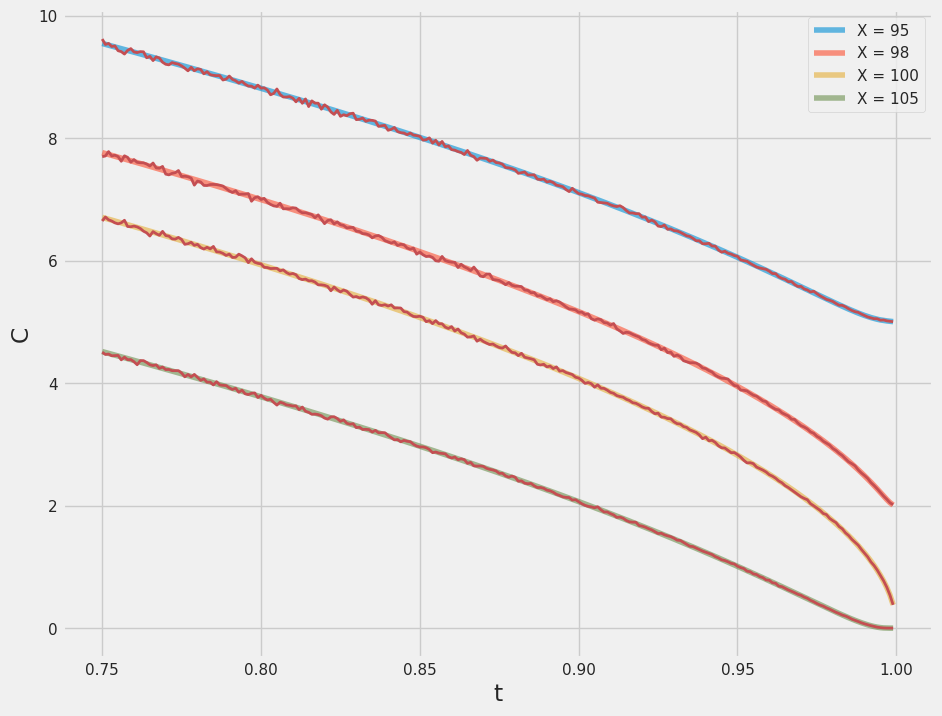

In [21]:
df = pd.DataFrame(columns=['t','95','98','100','105'])
t = np.arange(0.75, 1.0, 0.001)

data = []
for i in t:
    data.append({'t': i, '95': BS_Call_MC(100,95,0.06,0.3,1,i,100000),'98': BS_Call_MC(100,98,0.06,0.3,1,i,100000),'100': BS_Call_MC(100,100,0.06,0.3,1,i,100000),'105': BS_Call_MC(100,105,0.06,0.3,1,i,100000)})
df = pd.DataFrame(data)

plt.figure(figsize=(10,8))
plt.plot(t,BS_Call_Exact(100,95,0.06,0.3,1,t),alpha=0.6, label = 'X = 95')
plt.plot(t,BS_Call_Exact(100,98,0.06,0.3,1,t),alpha=0.6, label = 'X = 98')
plt.plot(t,BS_Call_Exact(100,100,0.06,0.3,1,t),alpha=0.6, label = 'X = 100')
plt.plot(t,BS_Call_Exact(100,105,0.06,0.3,1,t),alpha=0.6, label = 'X = 105')

plt.plot(df['t'],df['95'],lw=2,c='r')
plt.plot(df['t'],df['98'],lw=2,c='r')
plt.plot(df['t'],df['100'],lw=2,c='r')
plt.plot(df['t'],df['105'],lw=2,c='r')

plt.legend()
plt.xlabel('t')
plt.ylabel('C')

plt.show()